In [1]:
# Library imports
import numpy as np

import tools
from train import generate_graph, train

In [2]:
# Fix random seed for reproducibility
np.random.seed(628496)

# Stop on errors
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# Generate the synthetic data
edges_by_day, last_day, raw_accounts = tools.simulate_simple_data()

# Count the number of generated edges to validate that it has generated correctly
count_edges = sum(len(day) for day in edges_by_day.values())
print(f'There were {count_edges} edges generated.')

There were 240 edges generated.


In [4]:
# Create a graph object with the generated data
graph = generate_graph(
    raw_accounts=raw_accounts,
    edges_by_day=edges_by_day,
    last_day=last_day,
    node_dimension=128,
    graph_kwords={
        'causal_learning_rate': 0.01,
        'weight_regularisation_rate': 10**(-5),
        'spontaneous_regularisation_rate': 10**(-7)
    }
)

In [5]:
# Train the model for a short time to move the parameters away
# from their small initialised values
probabilities = train(graph, edges_by_day, last_day, iterations=50,
      plot_log_likelihood=False, use_tqdm=True,
      spontaneous_learning_startpoint=0)

100%|██████████| 50/50 [04:01<00:00,  4.82s/it]


Plot $\overrightarrow{s}_k^{(0)}$ and partial derivatives

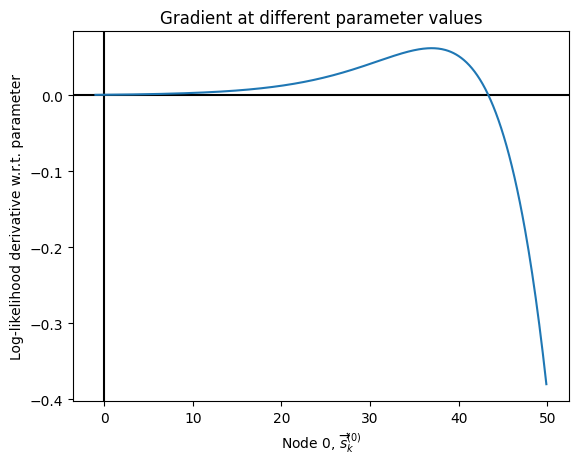

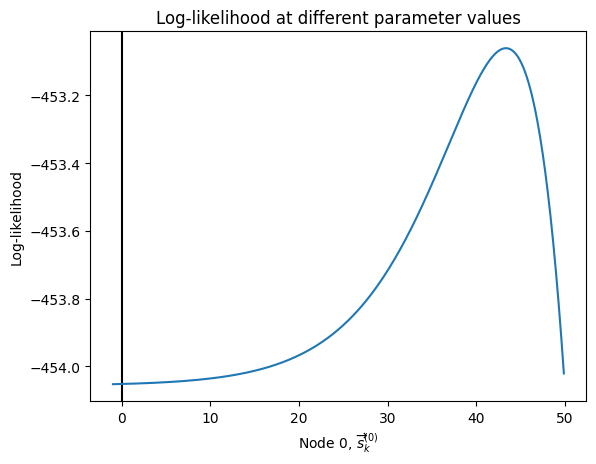

In [9]:
possible_values = np.hstack((
    np.arange(-1, 50, 0.1)
))

tools.plot_gradients_and_probabilities(
    graph, edges_by_day, last_day,
    node_index=0, node_dimension=0, embedding_type='s_k_0',
    possible_values=possible_values
    )

Plot $\overrightarrow{r}_i^{(\alpha)}$ and partial derivatives

100%|██████████| 401/401 [43:35<00:00,  6.52s/it]


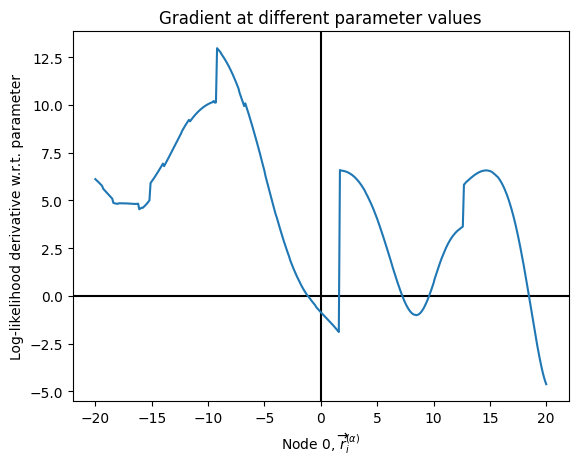

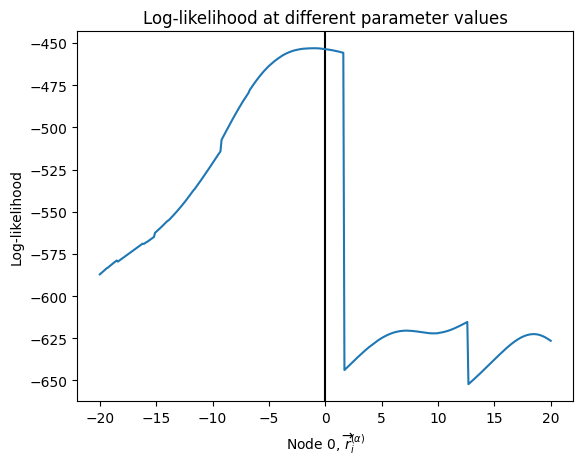

In [6]:
possible_values = np.hstack((
    np.arange(-20, 20.005, 0.1)
))

tools.plot_gradients_and_probabilities(
    graph, edges_by_day, last_day,
    node_index=0, node_dimension=0, embedding_type='r_i_alpha',
    possible_values=possible_values
    )

Plot $\overrightarrow{r}_i^{(\beta)}$ and partial derivatives

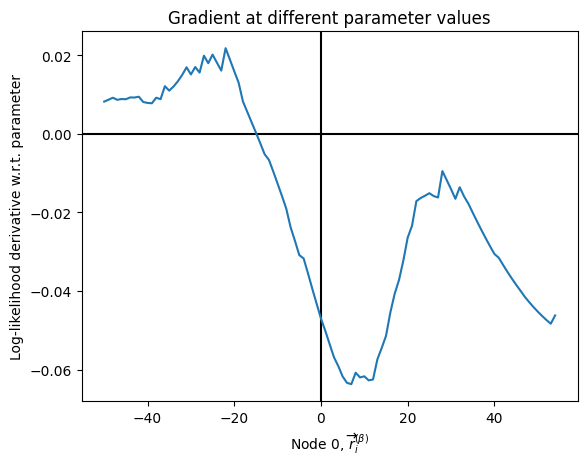

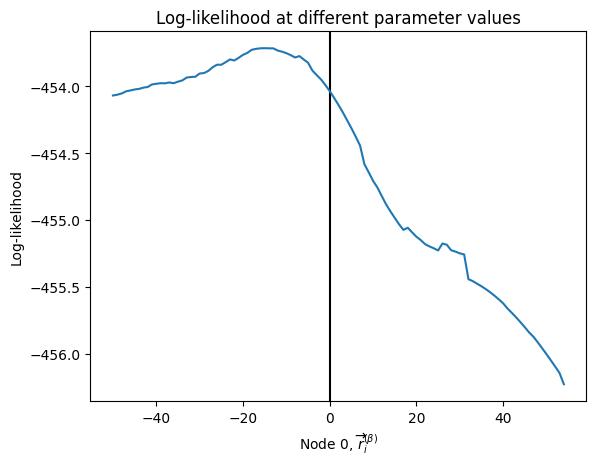

In [ ]:
possible_values = np.arange(-50, 55, 1)

tools.plot_gradients_and_probabilities(
    graph, edges_by_day, last_day,
    node_index=0, node_dimension=0, embedding_type='r_i_beta',
    possible_values=possible_values
    )

Plot $\overrightarrow{r}_i^{(W)}$ and partial derivatives

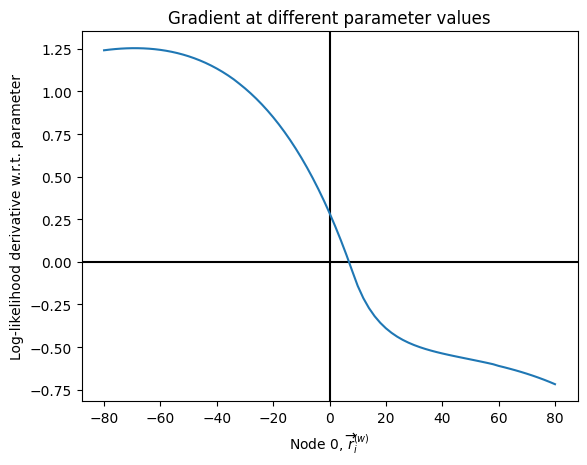

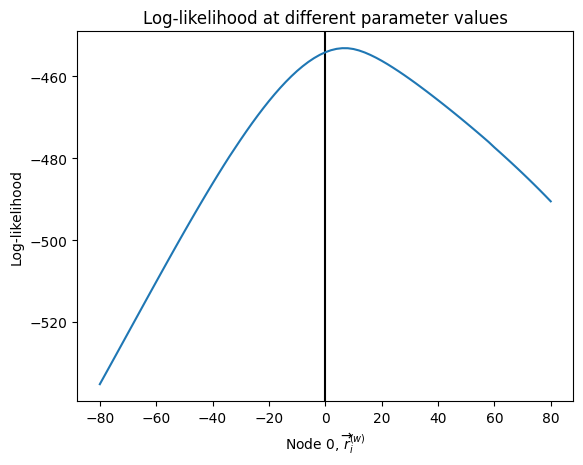

In [ ]:
possible_values = np.arange(-80, 82, 2)

tools.plot_gradients_and_probabilities(
    graph, edges_by_day, last_day,
    node_index=0, node_dimension=0, embedding_type='r_i_w',
    possible_values=possible_values
    )